# COGS 108 - Final Project


## Permissions
Place an X in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that PIDs will be scraped from the public submission, but student names will be included.)

[X] YES - make available

[ ] NO - keep private


# Overview

Our project explores the effect of Airbnb in rent prices of San Diego. The data sets include average rent prices from Zillow from 2011 to 2018 and utilize Airbnb's data from 2014 to 2017. We then analyze this by using cross-correlation to observe if Airbnb has a reasonable contribution to the change in San Diego's rent prices.

# Names

* John Kim

* Oscar Reyes

* Hae-Chan Grace Kim

* Edgar Matias

* Aaron Hernandez


# Group Members IDs

* A13592794
* A13664593
* A13937393
* A15702345
* A12623880


# Research Question
 
How does Airbnb's rental play a role in affecting the rental prices of San Diego? Would it have a signifcant impact in increasing or decreasing rental prices of San Diego neighborhoods?

# Background and Prior Work

Over the years, Airbnb has been dominating to market in the rental industry and with 660,000 listings alone in the United States of this year, a study done in Boston 2016 suggested a 10% increase in Airbnb listings led to a 0.42% increase in rent prices being asked in that area (1).

As avid Airbnb users, we realized that using this service is more appealing to our demographic as in "2018, 58% of hosts and booking guests worldwide were millennials". When looking for places to stay, people tend to open up Airbnb rather than using other third-party apps or services that offer stays such as Hotels.com or Booking.com. We began to wonder why this is the case and wanted to look into the impact it can bring on the price of the general renting market in a specific city (2). 

What makes this topic interesting is the fact that Airbnb offers services such as short-term and long-term stays which can almost replace the traditional renting space options such as month to month rent or hotel options. Oftentimes Airbnb’s are preferred for long-term stays since the consumer has access to a place equipped with a better living situation with perks such as a kitchen, a TV, and generally more spacious rooms. In regards to our hypothesis, we wanted to look at the positive or negative impact Airbnb can bring in a city in regards to rent prices. We were able to come up with this by looking at articles and publishings that attribute to the impact on hotel price strategy (3). This allows us to critically analyze and find patterns Airbnb introduces in the market of renting a space.
 
The topic and our dataset would be important to stakeholders such as renters and landlords. We also want to see the significance of how San Diego state bill was passed and its attribution to the importance of people living and coming to rent in this city (4). To help aid our direction for this topic by looking at two case studies where one looks into hotel vs Airbnb prices, while the other explains the impact Airbnb brings into the housing market. The study focusing on prices between hotel and Airbnb concluded that “Hotels more centrally located show more fierce competition with their Airbnb neighbors, with less central hotels less affected (5).” This highlights an interesting dynamic Airbnb brings into the market of rental spaces. Additionally, the other case study makes a statement about how there is a trend for absentee landlords to move their long-term rent to short-term rent (6).
 
References:

(1) https://www.sciencedirect.com/science/article/abs/pii/S1051137717300876

(2) https://ipropertymanagement.com/research/airbnb-statistics#how-does-airbnb-compare-to-hotels

(3) https://www.smartcitiesdive.com/ex/sustainablecitiescollective/airbnb-phenomenon-what-s-impact-cities/294081/

(4) https://www.sandiegouniontribune.com/business/tourism/story/2019-05-23/state-bill-clamping-down-on-airbnb-rentals-in-san-diego-clears-major-hurdle-in-state-assembly

(5) https://nycdatascience.com/blog/student-works/web-scraping/hotels-vs-airbnb-barcelona-case-study-proof-of-concept/

(6) https://phys.org/news/2019-08-airbnb-affect-rents-housing-prices.html

# Hypothesis

We hypothesize that having an Airbnb in a city will have a positive effect on driving rent prices of surrounding rentals down from the perspective of renters. With the competition of Airbnb in the rental market, we think it will make the landlords lower they’re prices to compete with Airbnb.

# Dataset(s)

## Airbnb rental price in San Deigo
* Dataset Name: Airbnb rental price in San Diego
* Link to the dataset: http://tomslee.net/airbnb-data-collection-get-the-data
* Number of observations: These datasets range from 2014 to 2017 and contains (1901 to 9911) rows and 14 columns.

These datasets consist of scrapings of Airbnb listings in San Diego. We used two months per year from 2014 to 2017 which totals 8 datasets from this source. We specifically chose 2 months to contrast the early and late part of the year to use it as a comparison to the rental price found in Zillow below. 

## Zillow average rent price 
* Dataset Name: Zillow Rent data
* Link to the dataset: https://www.zillow.com/research/data/
* Number of observations: This dataset contains 9239 rows and 119 columns.

This data form Zillow's housing data which has a rent dataset ranging monthly from 2010 to 2019. There are multiple cities and rent prices according to their geolocation. We will clean the data to only includes observations from the city of San Diego. 

# Setup

We will include basic python packages for computing and analyzing our datasets. We will also use matplotlib and seaborn to plot out graphs and ultimately use it for our analysis protion.

In [64]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy import stats
warnings.filterwarnings('ignore')
import matplotlib.ticker as mticker
#from plotly import express as px #install using: 'easy_install plotly==4.5.4'
from IPython.display import Image
cscale = [
          [0.0, 'rgb(165,0,38)'], 
          [0.0015, 'rgb(215,48,39)'], 
          [0.015, 'rgb(250, 152, 122)'], 
          [0.08, 'rgb(208, 254, 144)'], 
          [0.3, 'rgb(0, 255, 179)'], 
          [0.5, 'rgb(171,217,233)'], 
          [0.8, 'rgb(116,173,209)'], 
          [0.9, 'rgb(69,117,180)'], 
          [1.0, 'rgb(49,54,149)']
         ]

# Data Cleaning
For our data cleaning, we applied basic cleaning methods to dissect and get the observations we wanted while making the data cleaner to read. We took out values that were null and also datasets that did not have any recording of the full year range we are looking at. Lastly we also irrelevant observations such as not San Diego.

In [65]:
# load data set in csv
df_zillow_rent = pd.read_csv("Neighborhood_Zri_AllHomesPlusMultifamily.csv")
# check out the top 5 rows
df_zillow_rent.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-09,2010-10,2010-11,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
0,274772,Northeast Dallas,Dallas,TX,Dallas-Fort Worth-Arlington,Dallas County,1,1067.0,1073.0,1086.0,...,1361.0,1365.0,1369.0,1372.0,1373.0,1377.0,1393.0,1400.0,1402.0,1402.0
1,112345,Maryvale,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,2,881.0,900.0,898.0,...,1169.0,1174.0,1183.0,1194.0,1205.0,1212.0,1227.0,1238.0,1242.0,1260.0
2,192689,Paradise,Las Vegas,NV,Las Vegas-Henderson-Paradise,Clark County,3,1095.0,1096.0,1102.0,...,1309.0,1317.0,1326.0,1336.0,1345.0,1352.0,1371.0,1375.0,1383.0,1389.0
3,270958,Upper West Side,New York,NY,New York-Newark-Jersey City,New York County,4,3203.0,3241.0,3248.0,...,3973.0,3965.0,3956.0,3949.0,3921.0,3945.0,4033.0,4080.0,4001.0,NaN
4,118208,South Los Angeles,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,5,1771.0,1797.0,1794.0,...,2373.0,2374.0,2379.0,2386.0,2389.0,2385.0,2381.0,2391.0,2369.0,2351.0


In [66]:
# Check out basic information about the datafram
df_zillow_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5392 entries, 0 to 5391
Columns: 120 entries, RegionID to 2020-01
dtypes: float64(113), int64(2), object(5)
memory usage: 4.9+ MB


We were able to decide what to keep and not keep after viewing the general information and types of values we saw on the dataset. 

## Cleaning Zillow data set

The Zillow data includes many other locations apart from San Diego, so we dropped any rows that is not San Diego. Additionally we wanted to drop columns such as State, RegionID, and Size Rank.

### Clean the dataframe to only contain San Diego
We replaced the previous dataframe to narrow down our list to neighborhoods in San Diego. 

In [67]:
# replace dataframe to only contain San Diego rows in the City column
df_zillow_rent = df_zillow_rent[df_zillow_rent['City'] == 'San Diego']
# print results
df_zillow_rent

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-09,2010-10,2010-11,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
86,116625,Mira Mesa,San Diego,CA,San Diego-Carlsbad,San Diego County,87,1851.0,1860.0,1881.0,...,2408.0,2421.0,2434.0,2447.0,2453.0,2458.0,2473.0,2473.0,2503.0,2484.0
179,118673,University City,San Diego,CA,San Diego-Carlsbad,San Diego County,180,2049.0,2054.0,2058.0,...,2600.0,2615.0,2639.0,2668.0,2695.0,2717.0,2759.0,2741.0,2710.0,2695.0
186,117557,Rancho Penasquitos,San Diego,CA,San Diego-Carlsbad,San Diego County,187,1874.0,1859.0,1867.0,...,2409.0,2414.0,2425.0,2440.0,2454.0,2446.0,2426.0,2428.0,2463.0,2457.0
205,273140,Carmel Valley,San Diego,CA,San Diego-Carlsbad,San Diego County,206,2967.0,2952.0,2940.0,...,3267.0,3282.0,3288.0,3308.0,3318.0,3319.0,3337.0,3306.0,3293.0,3252.0
217,275127,Rancho Bernardo,San Diego,CA,San Diego-Carlsbad,San Diego County,218,1953.0,1976.0,1971.0,...,2424.0,2451.0,2470.0,2485.0,2482.0,2483.0,2481.0,2481.0,2510.0,2518.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4255,116638,Mission Beach,San Diego,CA,San Diego-Carlsbad,San Diego County,4256,3748.0,3772.0,3754.0,...,3561.0,3635.0,3683.0,3712.0,3690.0,3669.0,3693.0,3717.0,3722.0,3719.0
4775,116026,La Playa,San Diego,CA,San Diego-Carlsbad,San Diego County,4776,3234.0,3199.0,3155.0,...,3808.0,3799.0,3791.0,3786.0,3767.0,3751.0,3685.0,3688.0,3717.0,3757.0
4809,268312,Mission Valley West,San Diego,CA,San Diego-Carlsbad,San Diego County,4810,1876.0,1891.0,1902.0,...,2279.0,2277.0,2287.0,2303.0,2321.0,2329.0,2322.0,2373.0,2393.0,2407.0
5122,273355,Cortez Hill,San Diego,CA,San Diego-Carlsbad,San Diego County,5123,1930.0,1933.0,1960.0,...,2202.0,2223.0,2233.0,2247.0,2260.0,2272.0,2287.0,2274.0,2291.0,2271.0


### Drop columns
We then dropped the columns that were not relevant and reset the index so that we have a cleaner dataframe to work with.

In [68]:
# Drop columns
df_zillow_rent = df_zillow_rent.drop(columns = ['RegionID', 'Metro', 'CountyName', 'State', 'CountyName', 'City'], axis = 1)
# Reset index of the dataframe
df_zillow_rent = df_zillow_rent.reset_index()
# drop index label 
df_zillow_rent = df_zillow_rent.drop(columns = 'index', axis = 1 )
df_zillow_rent = df_zillow_rent.drop(df_zillow_rent.iloc[:,2:6], axis = 1)

### Cleaning Zillow Data More

In [69]:
#pd.set_option('display.max_rows', 1000)

for i in range(3, 20):
    df_zillow_rent = df_zillow_rent.drop(df_zillow_rent.iloc[:,i:i+5], axis = 1)
df_zillow_rent = df_zillow_rent.drop(df_zillow_rent.iloc[:,18:], axis = 1)
df_zillow_rent = df_zillow_rent.drop(columns = ['SizeRank'])
df_zillow_rent = df_zillow_rent.sort_values('RegionName')
df_zillow_rent = df_zillow_rent.reset_index()
df_zillow_rent = df_zillow_rent.drop(columns = 'index', axis = 1 )
df_zillow_rent

,RegionName,2011-01,2011-07,2012-01,2012-07,2013-01,2013-07,2014-01,2014-07,2015-01,2015-07,2016-01,2016-07,2017-01,2017-07,2018-01,2018-07
0,Adams North,1723.0,1714.0,1749.0,1719.0,1711.0,1749.0,1834.0,1857.0,2000.0,2111.0,2181.0,2186.0,2220.0,2280.0,2284.0,2291.0
1,Allied Gardens,1622.0,1629.0,1651.0,1668.0,1723.0,1735.0,1741.0,1743.0,1787.0,1864.0,1931.0,1973.0,1965.0,2014.0,2048.0,2115.0
2,Bankers Hill,2378.0,2385.0,2361.0,2338.0,2395.0,2451.0,2531.0,2551.0,2639.0,2642.0,2733.0,2763.0,2768.0,2815.0,2806.0,2832.0
3,Bay Ho,2205.0,2136.0,2072.0,2035.0,2057.0,2109.0,2204.0,2251.0,2351.0,2397.0,2441.0,2502.0,2461.0,2489.0,2459.0,2481.0
4,Bay Park,2145.0,2121.0,2093.0,2078.0,2059.0,2115.0,2191.0,2217.0,2312.0,2334.0,2421.0,2460.0,2469.0,2532.0,2499.0,2533.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Tierrasanta,2044.0,2064.0,2051.0,2048.0,2043.0,2085.0,2121.0,2095.0,2190.0,2261.0,2308.0,2372.0,2340.0,2379.0,2381.0,2460.0
76,Torrey Highlands,NaN,NaN,NaN,2946.0,NaN,3029.0,3063.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3051.0
77,University City,2038.0,2032.0,2020.0,2038.0,2046.0,2081.0,2168.0,2209.0,2328.0,2335.0,2426.0,2485.0,2490.0,2528.0,2519.0,2583.0
78,University Heights,1764.0,1726.0,1724.0,1714.0,1735.0,1777.0,1822.0,1859.0,1934.0,2035.0,2077.0,2099.0,2128.0,2179.0,2183.0,2193.0


### Dropping rows with missing data
After cleaning the data, we found that from printing the dataframe we found some values that were missing. Thefore we wanted to inspect the rows that are missing and drop them as the visualizations will be not relevant to other rows that have the full values.

We inspected the dataframe to see how many missing values we had

In [70]:
# find missing values
df_zillow_rent.isna().sum()

RegionName    0
2011-01       6
2011-07       6
2012-01       6
2012-07       4
2013-01       5
2013-07       3
2014-01       4
2014-07       4
2015-01       2
2015-07       4
2016-01       3
2016-07       3
2017-01       3
2017-07       2
2018-01       2
2018-07       2
dtype: int64

In [71]:
# Drop null values
df_zillow_rent = df_zillow_rent.dropna()
df_zillow_rent = df_zillow_rent.reset_index()
df_zillow_rent = df_zillow_rent.drop(columns = 'index', axis = 1 )
df_zillow_rent

,RegionName,2011-01,2011-07,2012-01,2012-07,2013-01,2013-07,2014-01,2014-07,2015-01,2015-07,2016-01,2016-07,2017-01,2017-07,2018-01,2018-07
0,Adams North,1723.0,1714.0,1749.0,1719.0,1711.0,1749.0,1834.0,1857.0,2000.0,2111.0,2181.0,2186.0,2220.0,2280.0,2284.0,2291.0
1,Allied Gardens,1622.0,1629.0,1651.0,1668.0,1723.0,1735.0,1741.0,1743.0,1787.0,1864.0,1931.0,1973.0,1965.0,2014.0,2048.0,2115.0
2,Bankers Hill,2378.0,2385.0,2361.0,2338.0,2395.0,2451.0,2531.0,2551.0,2639.0,2642.0,2733.0,2763.0,2768.0,2815.0,2806.0,2832.0
3,Bay Ho,2205.0,2136.0,2072.0,2035.0,2057.0,2109.0,2204.0,2251.0,2351.0,2397.0,2441.0,2502.0,2461.0,2489.0,2459.0,2481.0
4,Bay Park,2145.0,2121.0,2093.0,2078.0,2059.0,2115.0,2191.0,2217.0,2312.0,2334.0,2421.0,2460.0,2469.0,2532.0,2499.0,2533.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Talmadge,1823.0,1812.0,1841.0,1820.0,1791.0,1826.0,1881.0,1881.0,1951.0,2031.0,2065.0,2104.0,2111.0,2164.0,2184.0,2244.0
67,Tierrasanta,2044.0,2064.0,2051.0,2048.0,2043.0,2085.0,2121.0,2095.0,2190.0,2261.0,2308.0,2372.0,2340.0,2379.0,2381.0,2460.0
68,University City,2038.0,2032.0,2020.0,2038.0,2046.0,2081.0,2168.0,2209.0,2328.0,2335.0,2426.0,2485.0,2490.0,2528.0,2519.0,2583.0
69,University Heights,1764.0,1726.0,1724.0,1714.0,1735.0,1777.0,1822.0,1859.0,1934.0,2035.0,2077.0,2099.0,2128.0,2179.0,2183.0,2193.0


In [72]:
# check again if the missing values are gone
df_zillow_rent.isna().sum()

RegionName    0
2011-01       0
2011-07       0
2012-01       0
2012-07       0
2013-01       0
2013-07       0
2014-01       0
2014-07       0
2015-01       0
2015-07       0
2016-01       0
2016-07       0
2017-01       0
2017-07       0
2018-01       0
2018-07       0
dtype: int64

Awesome no more missing values! Now time to see if there are any outliers that might affect with our data visalizations and the anaylsis later on in the project.

In [73]:
# show the statistics
df_zillow_rent.describe()

,2011-01,2011-07,2012-01,2012-07,2013-01,2013-07,2014-01,2014-07,2015-01,2015-07,2016-01,2016-07,2017-01,2017-07,2018-01,2018-07
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,2067.859155,2022.507042,2011.676056,1993.535211,2011.000000,2052.253521,2106.901408,2129.704225,2222.028169,2289.140845,2336.718310,2382.295775,2388.084507,2439.450704,2441.042254,2481.492958
std,501.495401,485.001057,446.545175,450.114266,451.001837,467.405505,476.883429,475.127784,500.960448,501.089963,485.879679,494.555598,478.981412,483.885016,456.786897,459.892344
min,1303.000000,1312.000000,1350.000000,1347.000000,1353.000000,1374.000000,1448.000000,1524.000000,1601.000000,1651.000000,1702.000000,1709.000000,1757.000000,1806.000000,1822.000000,1873.000000
25%,1789.500000,1712.500000,1725.000000,1685.500000,1729.000000,1754.000000,1796.000000,1817.500000,1915.000000,1983.000000,2050.500000,2083.500000,2091.500000,2140.500000,2179.000000,2210.500000
50%,1988.000000,1937.000000,1939.000000,1911.000000,1948.000000,1989.000000,2029.000000,1974.000000,2114.000000,2212.000000,2251.000000,2298.000000,2310.000000,2379.000000,2360.000000,2410.000000
75%,2193.500000,2161.000000,2153.500000,2140.500000,2165.000000,2239.500000,2307.500000,2341.500000,2425.500000,2471.000000,2518.000000,2570.500000,2557.000000,2586.000000,2579.500000,2651.500000
max,4012.000000,4029.000000,4011.000000,4109.000000,4130.000000,4111.000000,4216.000000,4239.000000,4451.000000,4580.000000,4533.000000,4613.000000,4551.000000,4651.000000,4586.000000,4534.000000


## Cleaning Airbnb data sets
For the Airbnb datasets we have 8 in total that we will need to clean. Becuase it will take same cleaning method for all 8 we will just apply the same codes to the rest after the first one. We will clean it by dropping certain columns that we do not need and taking the average of all prices in a particular neighborhood.

In [74]:
#for i in range(0, 80):
    #city = df_zillow_rent.loc[i, :].squeeze()
    #print(city[0])
    #city.iloc[1:].plot()
    #plt.show()

In [75]:
# store the data set into the dataframe
df_2014_A = pd.read_csv("AirBnb Data/airbnb_san_diego_2014-05-25.csv")
#print top 5 rows of the dataframe
df_2014_A.head()

,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,last_modified
0,5570,8435,Entire home/apt,NaN,Mission Bay,0,NaN,6,2.0,224.0,1,32.784216,-117.252601,2014-05-25 15:36:52.982
1,8095,270,Entire home/apt,NaN,Ocean Beach,118,5.0,2,NaN,77.0,2,32.735170,-117.243793,2014-05-25 15:22:10.890
2,8488,25186,Entire home/apt,NaN,South Park,29,5.0,4,2.0,280.0,2,32.728386,-117.128238,2014-05-25 14:22:38.609
3,9553,31656,Private room,NaN,North Hills,2,5.0,2,1.0,112.0,1,32.753266,-117.141208,2014-05-25 14:37:52.088
4,14668,57636,Private room,NaN,Mira Mesa,120,5.0,2,1.0,69.0,1,32.931104,-117.152685,2014-05-25 14:36:11.889


### Drop columns  
We dropped non relevant columns that does not relate to the pricing.

In [76]:
# drop colums
df_2014_A = df_2014_A.drop(df_2014_A.iloc[:,10:], axis = 1)
df_2014_A = df_2014_A.drop(df_2014_A.iloc[:,0:4], axis = 1)
df_2014_A = df_2014_A.drop(df_2014_A.iloc[:,1:5], axis = 1)
# check the top 5 rows
df_2014_A.head()

,neighborhood,price
0,Mission Bay,224.0
1,Ocean Beach,77.0
2,South Park,280.0
3,North Hills,112.0
4,Mira Mesa,69.0


### Find average and clean the data
We grouped the neighborhoods and found the average rent price. After that we renamed the columns to have a proper comparison with the Zillow data. 

In [77]:
# find the average rent price per neighborhood
df_2014_A = df_2014_A.groupby(['neighborhood']).mean()
# reset the index
df_2014_A = df_2014_A.reset_index()
# rename to have a better comparison
df_2014_A = df_2014_A.rename(columns={"neighborhood": "RegionName"})
# rename for labeling the data sets for Airbnb
df_2014_A = df_2014_A.rename(columns={"price": "2014-A"})

### We will apply the same methods as above for the rest of the 7 data sets 
Dataframe names follow as Df_(year)_(A = First part, B = Last part of the year chosen)

In [78]:
df_2014_A = pd.read_csv("AirBnb Data/airbnb_san_diego_2014-05-25.csv")
df_2014_A = df_2014_A.drop(df_2014_A.iloc[:,10:], axis = 1)
df_2014_A = df_2014_A.drop(df_2014_A.iloc[:,0:4], axis = 1)
df_2014_A = df_2014_A.drop(df_2014_A.iloc[:,1:5], axis = 1)
df_2014_A = df_2014_A.groupby(['neighborhood']).mean()
df_2014_A = df_2014_A.reset_index()
df_2014_A = df_2014_A.rename(columns={"neighborhood": "RegionName"})
df_2014_A = df_2014_A.rename(columns={"price": "2014-A"})
#df_2014_A

In [79]:
df_2014_B = pd.read_csv("AirBnb Data/airbnb_san_diego_2014-11-03.csv")
df_2014_B = df_2014_B.drop(df_2014_B.iloc[:,10:], axis = 1)
df_2014_B = df_2014_B.drop(df_2014_B.iloc[:,0:4], axis = 1)
df_2014_B = df_2014_B.drop(df_2014_B.iloc[:,1:5], axis = 1)
df_2014_B = df_2014_B.groupby(['neighborhood']).mean()
df_2014_B = df_2014_B.reset_index()
df_2014_B = df_2014_B.rename(columns={"neighborhood": "RegionName"})
df_2014_B = df_2014_B.rename(columns={"price": "2014-B"})
#df_2014_B

In [80]:
df_2015_A = pd.read_csv("AirBnb Data/airbnb_san_diego_2015-08-22.csv")
df_2015_A = df_2015_A.drop(df_2015_A.iloc[:,10:], axis = 1)
df_2015_A = df_2015_A.drop(df_2015_A.iloc[:,0:4], axis = 1)
df_2015_A = df_2015_A.drop(df_2015_A.iloc[:,1:5], axis = 1)
df_2015_A = df_2015_A.groupby(['neighborhood']).mean()
df_2015_A = df_2015_A.reset_index()
df_2015_A = df_2015_A.rename(columns={"neighborhood": "RegionName"})
df_2015_A = df_2015_A.rename(columns={"price": "2015-A"})
#df_2015_A

In [81]:
df_2015_B = pd.read_csv("AirBnb Data/airbnb_san_diego_2015-10-23.csv")
df_2015_B = df_2015_B.drop(df_2015_B.iloc[:,10:], axis = 1)
df_2015_B = df_2015_B.drop(df_2015_B.iloc[:,0:4], axis = 1)
df_2015_B = df_2015_B.drop(df_2015_B.iloc[:,1:5], axis = 1)
df_2015_B = df_2015_B.groupby(['neighborhood']).mean()
df_2015_B = df_2015_B.reset_index()
df_2015_B = df_2015_B.rename(columns={"neighborhood": "RegionName"})
df_2015_B = df_2015_B.rename(columns={"price": "2015-B"})
#df_2015_B

In [82]:
df_2016_A = pd.read_csv("AirBnb Data/airbnb_san_diego_2016-01-19.csv")
df_2016_A = df_2016_A.drop(df_2016_A.iloc[:,10:], axis = 1)
df_2016_A = df_2016_A.drop(df_2016_A.iloc[:,0:4], axis = 1)
df_2016_A = df_2016_A.drop(df_2016_A.iloc[:,1:5], axis = 1)
df_2016_A = df_2016_A.groupby(['neighborhood']).mean()
df_2016_A = df_2016_A.reset_index()
df_2016_A = df_2016_A.rename(columns={"neighborhood": "RegionName"})
df_2016_A = df_2016_A.rename(columns={"price": "2016-A"})
#df_2016_A

In [83]:
df_2016_B = pd.read_csv("AirBnb Data/airbnb_san_diego_2016-07-19.csv")
df_2016_B = df_2016_B.drop(df_2016_B.iloc[:,10:], axis = 1)
df_2016_B = df_2016_B.drop(df_2016_B.iloc[:,0:4], axis = 1)
df_2016_B = df_2016_B.drop(df_2016_B.iloc[:,1:5], axis = 1)
df_2016_B = df_2016_B.groupby(['neighborhood']).mean()
df_2016_B = df_2016_B.reset_index()
df_2016_B = df_2016_B.rename(columns={"neighborhood": "RegionName"})
df_2016_B = df_2016_B.rename(columns={"price": "2016-B"})
#df_2016_B

In [84]:
df_2017_A = pd.read_csv("AirBnb Data/airbnb_san_diego_2016-01-19.csv")
df_2017_A = df_2017_A.drop(df_2017_A.iloc[:,10:], axis = 1)
df_2017_A = df_2017_A.drop(df_2017_A.iloc[:,0:4], axis = 1)
df_2017_A = df_2017_A.drop(df_2017_A.iloc[:,1:5], axis = 1)
df_2017_A = df_2017_A.groupby(['neighborhood']).mean()
df_2017_A = df_2017_A.reset_index()
df_2017_A = df_2017_A.rename(columns={"neighborhood": "RegionName"})
df_2017_A = df_2017_A.rename(columns={"price": "2017-A"})
#df_2017_A

In [85]:
df_2017_B = pd.read_csv("AirBnb Data/airbnb_san_diego_2016-07-19.csv")
df_2017_B = df_2017_B.drop(df_2017_B.iloc[:,10:], axis = 1)
df_2017_B = df_2017_B.drop(df_2017_B.iloc[:,0:4], axis = 1)
df_2017_B = df_2017_B.drop(df_2017_B.iloc[:,1:5], axis = 1)
df_2017_B = df_2017_B.groupby(['neighborhood']).mean()
df_2017_B = df_2017_B.reset_index()
df_2017_B = df_2017_B.rename(columns={"neighborhood": "RegionName"})
df_2017_B = df_2017_B.rename(columns={"price": "2017-B"})
#df_2017_B

### Organizing the dataframe from Airbnb into one dataframe
For the purpose of the comparison and our project we would need to combine the 8 datasets into 1 dataframe to effectively find ways to analyze our findings

In [86]:
# assign a new dataframe
df_airbnb = pd.DataFrame()
# append 
df_airbnb = df_airbnb.append(df_2014_A, ignore_index=True)
df_airbnb = df_airbnb.drop(columns = '2014-A', axis = 1 )
df_airbnb['2014-A'] = df_2014_A['2014-A']
df_airbnb['2014-B'] = df_2014_B['2014-B']
df_airbnb['2015-A'] = df_2015_A['2015-A']
df_airbnb['2015-B'] = df_2015_B['2015-B']
df_airbnb['2016-A'] = df_2016_A['2016-A']
df_airbnb['2016-B'] = df_2016_B['2016-B']
df_airbnb['2017-A'] = df_2017_A['2017-A']
df_airbnb['2017-B'] = df_2017_B['2017-B']

In [87]:
df_zillow = pd.merge(df_zillow_rent, df_2014_A, on='RegionName')
df_zillow = pd.merge(df_zillow, df_2014_B, on='RegionName')
df_zillow = pd.merge(df_zillow, df_2015_A, on='RegionName')
df_zillow = pd.merge(df_zillow, df_2015_B, on='RegionName')
df_zillow = pd.merge(df_zillow, df_2016_A, on='RegionName')
df_zillow = pd.merge(df_zillow, df_2016_B, on='RegionName')
df_zillow = pd.merge(df_zillow, df_2017_A, on='RegionName')
df_zillow = pd.merge(df_zillow, df_2017_B, on='RegionName')
df_zillow_rent = df_zillow.drop(df_zillow.iloc[:,17:], axis = 1)
df_airbnb_2 = pd.DataFrame()
L = [None] * 32
df_airbnb_2['RegionName'] = df_zillow['RegionName']
df_airbnb_2['2011-A'] = pd.Series(L)
df_airbnb_2['2011-B'] = pd.Series(L)
df_airbnb_2['2012-A'] = pd.Series(L)
df_airbnb_2['2012-B'] = pd.Series(L)
df_airbnb_2['2013-A'] = pd.Series(L)
df_airbnb_2['2013-B'] = pd.Series(L)
df_airbnb_2 = pd.merge(df_airbnb_2, df_zillow.drop(df_zillow.iloc[:,1:17], axis = 1), on='RegionName')
#df_airbnb_2

### Plot the graphs to visualize the dataframes 
Before moving onto the analysis we want to plot our dataframe for Zillow and Airbnb to compare there avereage rental pricing by year. 

Bay Ho


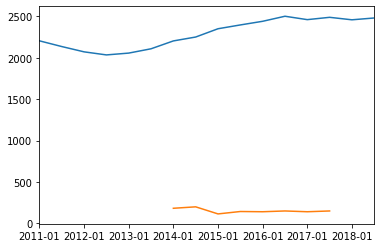

Bay Park


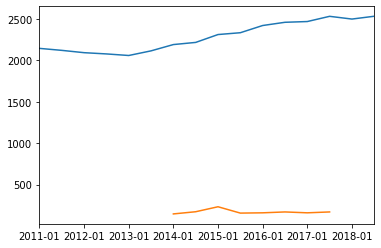

Carmel Valley


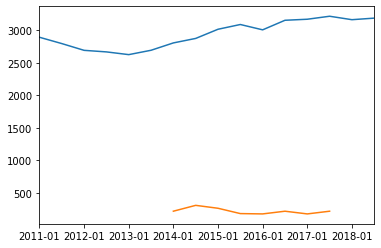

Cortez Hill


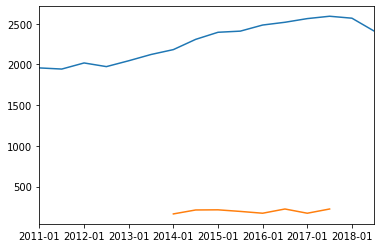

Del Cerro


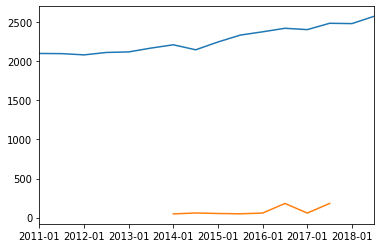

Del Mar Heights


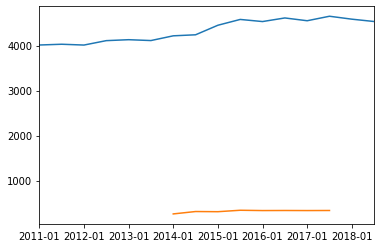

Encanto


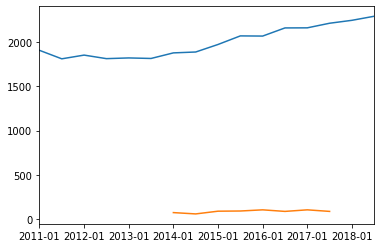

Grantville


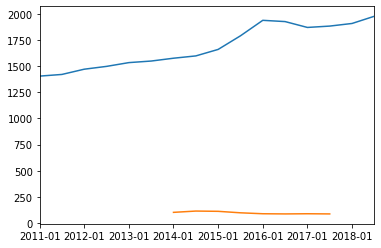

Kensington


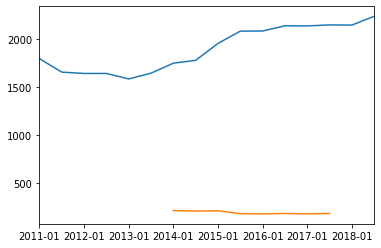

La Jolla


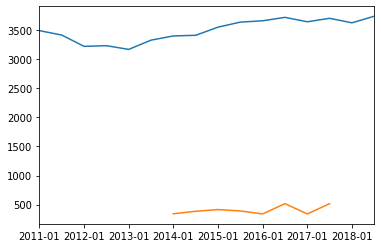

Lake Murray


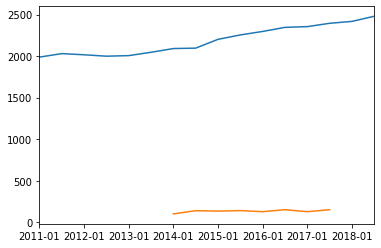

Linda Vista


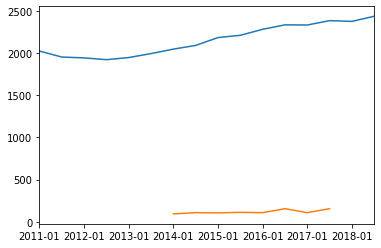

Little Italy


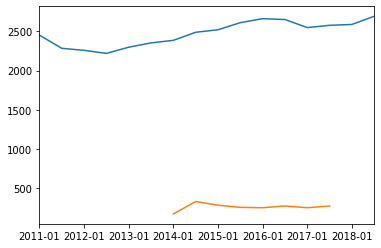

Loma Portal


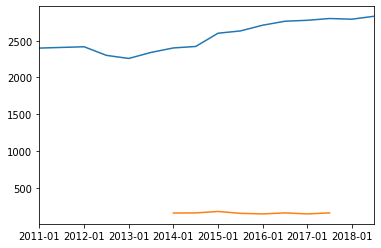

Marina


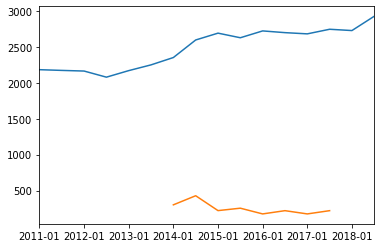

Midtown


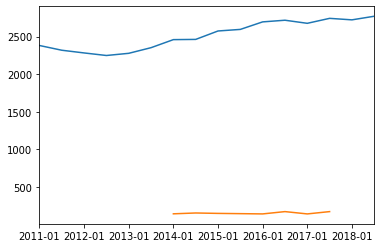

Mira Mesa


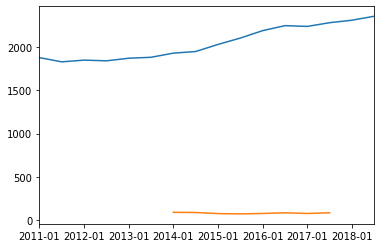

Normal Heights


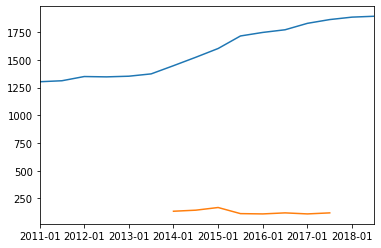

North Clairemont


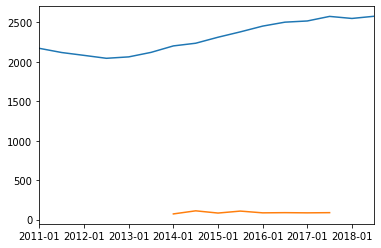

Oak Park


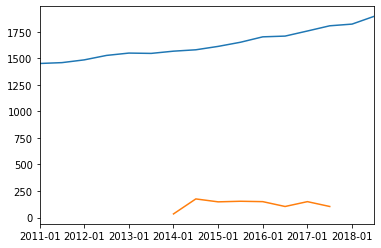

Ocean Beach


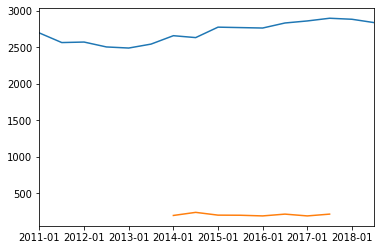

Pacific Beach


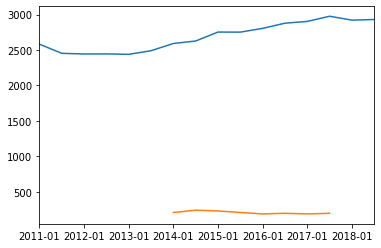

Rancho Penasquitos


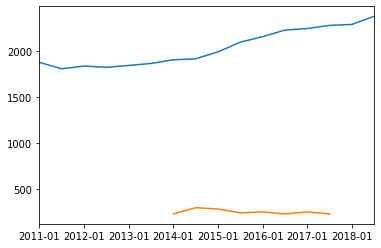

San Carlos


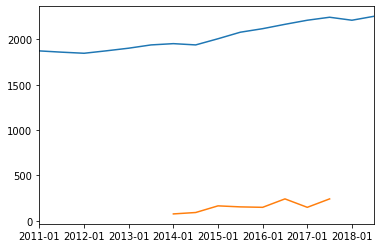

Scripps Ranch


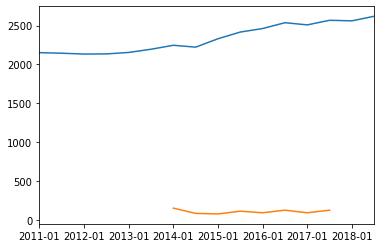

Serra Mesa


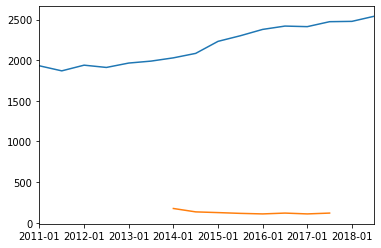

Sorrento Valley


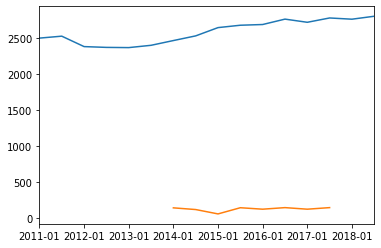

South Park


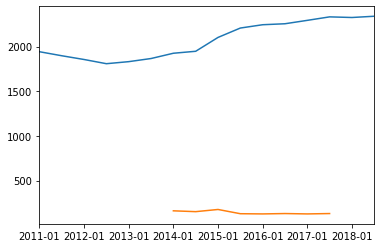

Talmadge


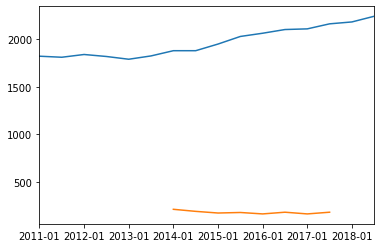

University City


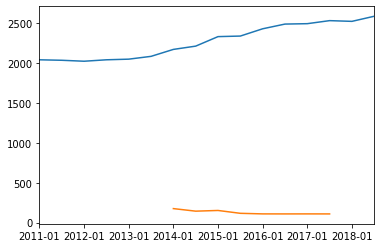

In [88]:
for i in range(0, 30):
    zillow = df_zillow_rent.loc[i, :].squeeze()
    airbnb = df_airbnb_2.loc[i, :].squeeze()
    print(airbnb[0])
    zillow.iloc[1:].plot()
    airbnb.iloc[1:].plot(use_index = False)
    plt.show()

In [89]:
df_zillow_rent2 = df_zillow_rent.drop(df_zillow_rent.iloc[:,1:7], axis = 1)
df_zillow_rent2 = df_zillow_rent2.drop(df_zillow_rent2.iloc[:,9:11], axis = 1)
df_airbnb_3 = df_airbnb_2.drop(df_airbnb_2.iloc[:,1:7], axis = 1)
df_zillow_rent2

,RegionName,2014-01,2014-07,2015-01,2015-07,2016-01,2016-07,2017-01,2017-07
0,Bay Ho,2204.0,2251.0,2351.0,2397.0,2441.0,2502.0,2461.0,2489.0
1,Bay Park,2191.0,2217.0,2312.0,2334.0,2421.0,2460.0,2469.0,2532.0
2,Carmel Valley,2807.0,2876.0,3017.0,3090.0,3008.0,3155.0,3171.0,3217.0
3,Cortez Hill,2183.0,2309.0,2396.0,2410.0,2485.0,2519.0,2564.0,2593.0
4,Del Cerro,2210.0,2146.0,2246.0,2334.0,2376.0,2421.0,2404.0,2485.0
5,Del Mar Heights,4216.0,4239.0,4451.0,4580.0,4533.0,4613.0,4551.0,4651.0
6,Encanto,1878.0,1888.0,1973.0,2070.0,2068.0,2160.0,2161.0,2213.0
7,Grantville,1575.0,1597.0,1659.0,1789.0,1937.0,1925.0,1869.0,1882.0
8,Kensington,1753.0,1783.0,1959.0,2087.0,2088.0,2143.0,2141.0,2152.0
9,La Jolla,3395.0,3406.0,3546.0,3632.0,3655.0,3714.0,3638.0,3698.0


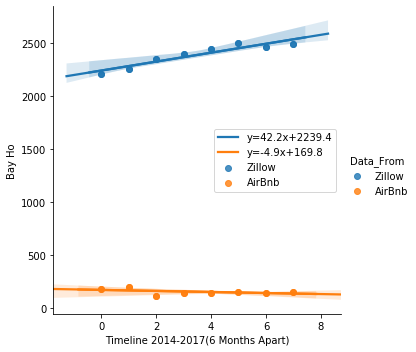

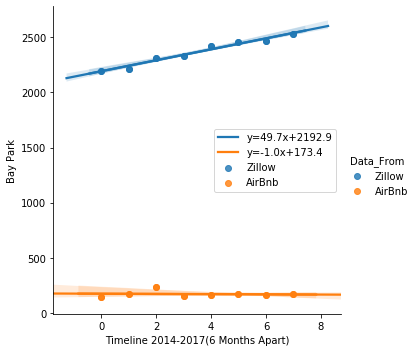

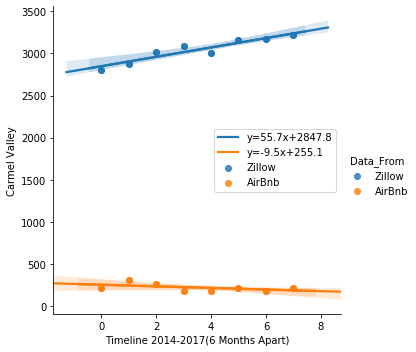

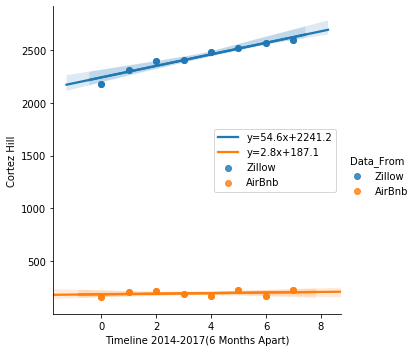

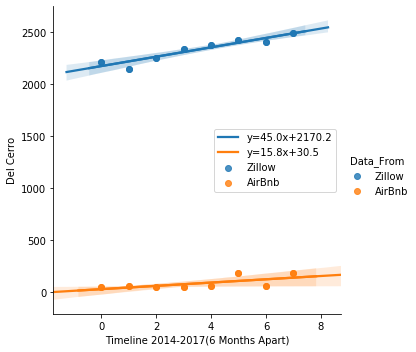

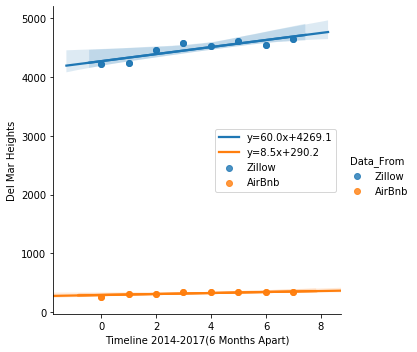

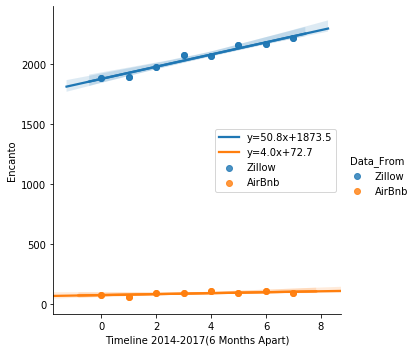

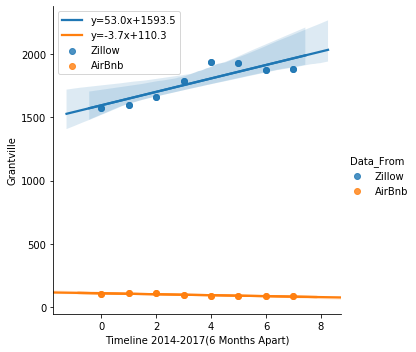

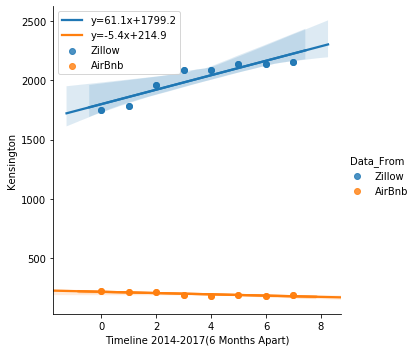

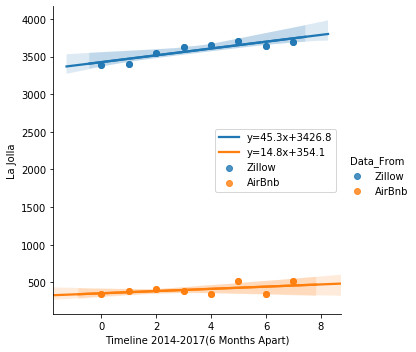

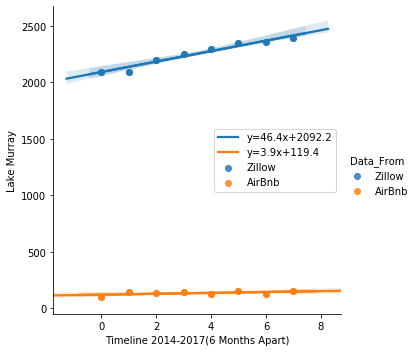

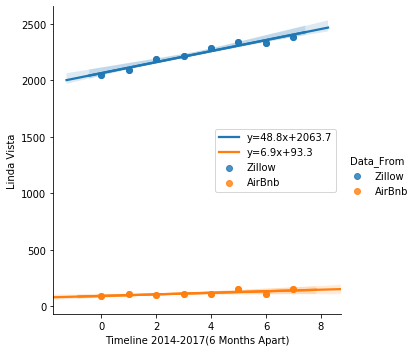

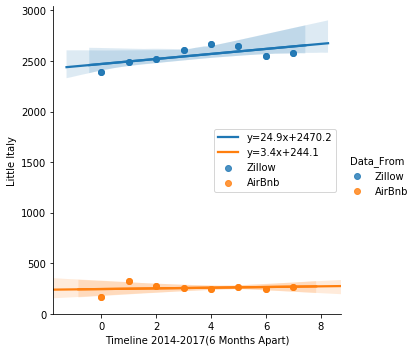

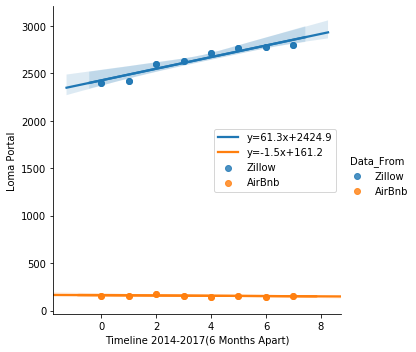

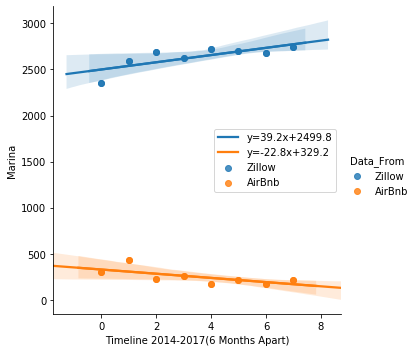

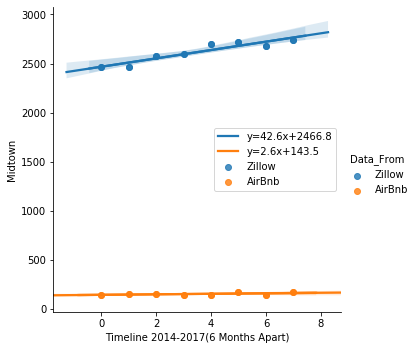

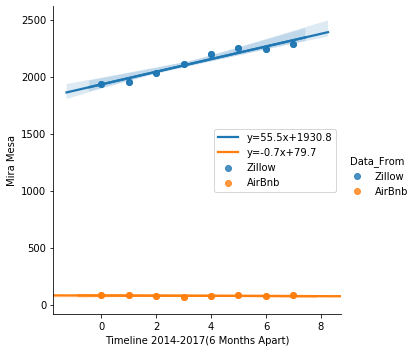

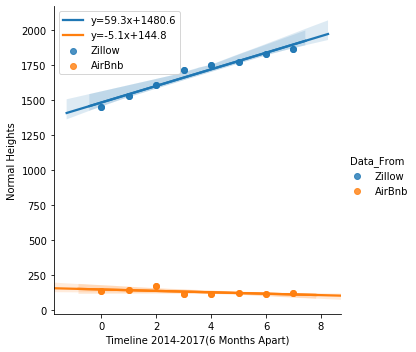

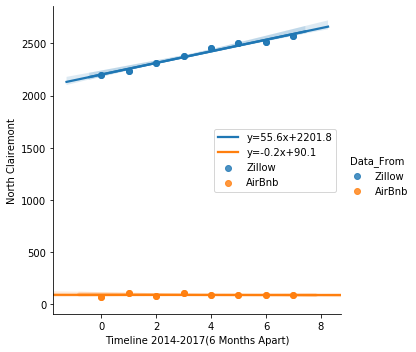

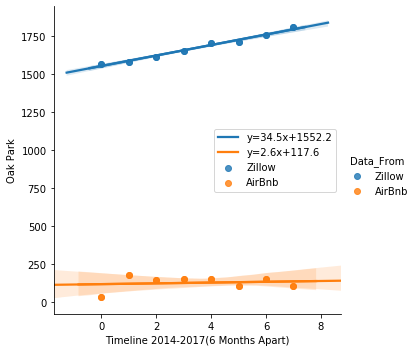

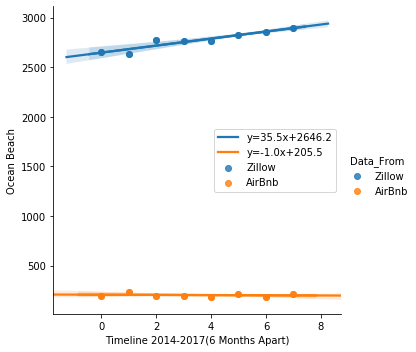

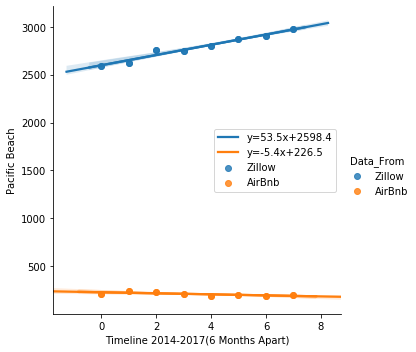

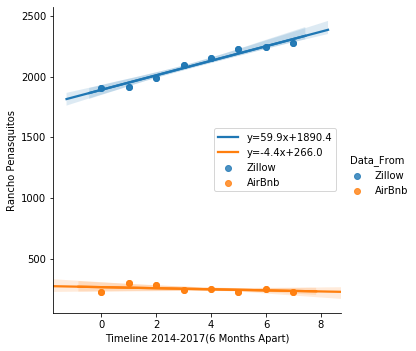

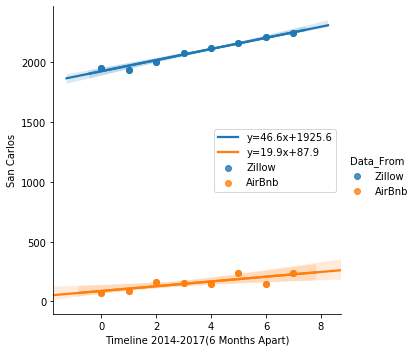

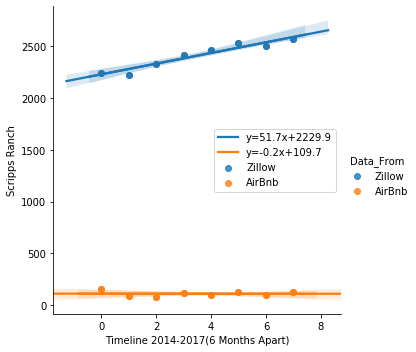

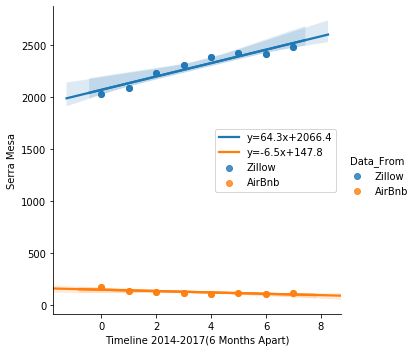

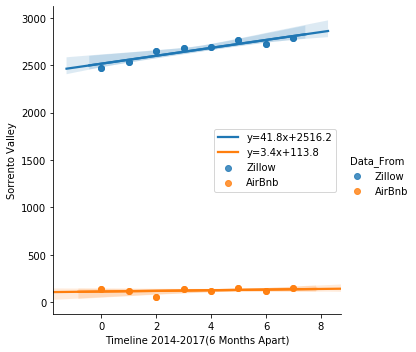

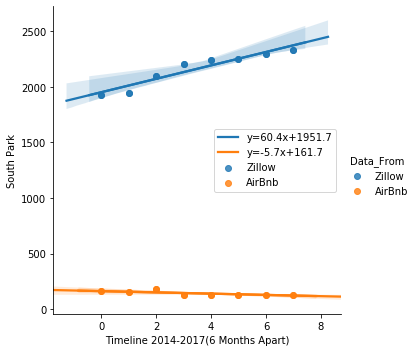

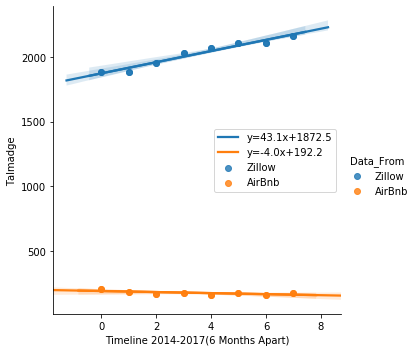

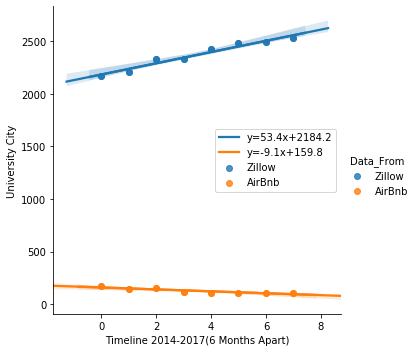

In [116]:
z1 = pd.DataFrame()
a1 = pd.DataFrame()
for i in range(0, 30):
    zillow = df_zillow_rent2.loc[i, :].squeeze()
    airbnb = df_airbnb_3.loc[i, :].squeeze()
    
    z1[zillow[0]] = zillow.iloc[1:].astype('int32')
    a1[airbnb[0]] = airbnb.iloc[1:].astype('int32')

z1 = z1.reset_index()
z1 = z1.drop(columns = 'index', axis = 1 )
z1 = z1.reset_index()

a1 = a1.reset_index()
a1 = a1.drop(columns = 'index', axis = 1 )
a1 = a1.reset_index()

Z = pd.concat([z1.assign(Data_From='Zillow'), a1.assign(Data_From='AirBnb')])
Z = Z.rename(columns={"index": "Timeline 2014-2017(6 Months Apart)"})

i=0
for (columnName, columnData) in Z.iteritems():
    if i == 0:
        i += 1
        continue
        
    elif i > 30:
        break
        
    else:
        sns.lmplot(x="Timeline 2014-2017(6 Months Apart)", y=columnName, hue="Data_From", data=Z, fit_reg=True)

        W = Z[Z['Data_From'] == 'Zillow']
        R = Z[Z['Data_From'] == 'AirBnb']
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(W["Timeline 2014-2017(6 Months Apart)"],W[columnName])
        ax = sns.regplot(x="Timeline 2014-2017(6 Months Apart)", y=columnName, data=W, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(R["Timeline 2014-2017(6 Months Apart)"],R[columnName])
        ax = sns.regplot(x="Timeline 2014-2017(6 Months Apart)", y=columnName, data=R, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
        
        ax.legend()
        plt.show()

    i += 1




# Data Analysis & Results

In [28]:
before_airbnb = pd.Series()
after_airbnb = pd.Series()
difference = pd.Series()

for i in range(0, 30):
    zillow = df_zillow_rent.loc[i,:].squeeze()
    #print(zillow[0])
    #print('Before Airbnb')
    #print(zillow[1:7].mean())
    before_airbnb = before_airbnb.append(pd.Series([zillow[1:7].mean()]), ignore_index=True)
    #print('After Airbnb')
    #print(zillow[7:17].mean())
    after_airbnb = after_airbnb.append(pd.Series([zillow[7:17].mean()]), ignore_index=True)
    #print('Difference')
    #print(zillow[7:17].mean() - zillow[1:7].mean())
    difference = difference.append(pd.Series([zillow[7:17].mean() - zillow[1:7].mean()]), ignore_index=True)
    #print('\n')
df_zillow_rent['Before AirBnb Average Price'] = before_airbnb
df_zillow_rent['After AirBnb Average Price'] = after_airbnb
df_zillow_rent['Difference'] = difference
#df_zillow_rent
    

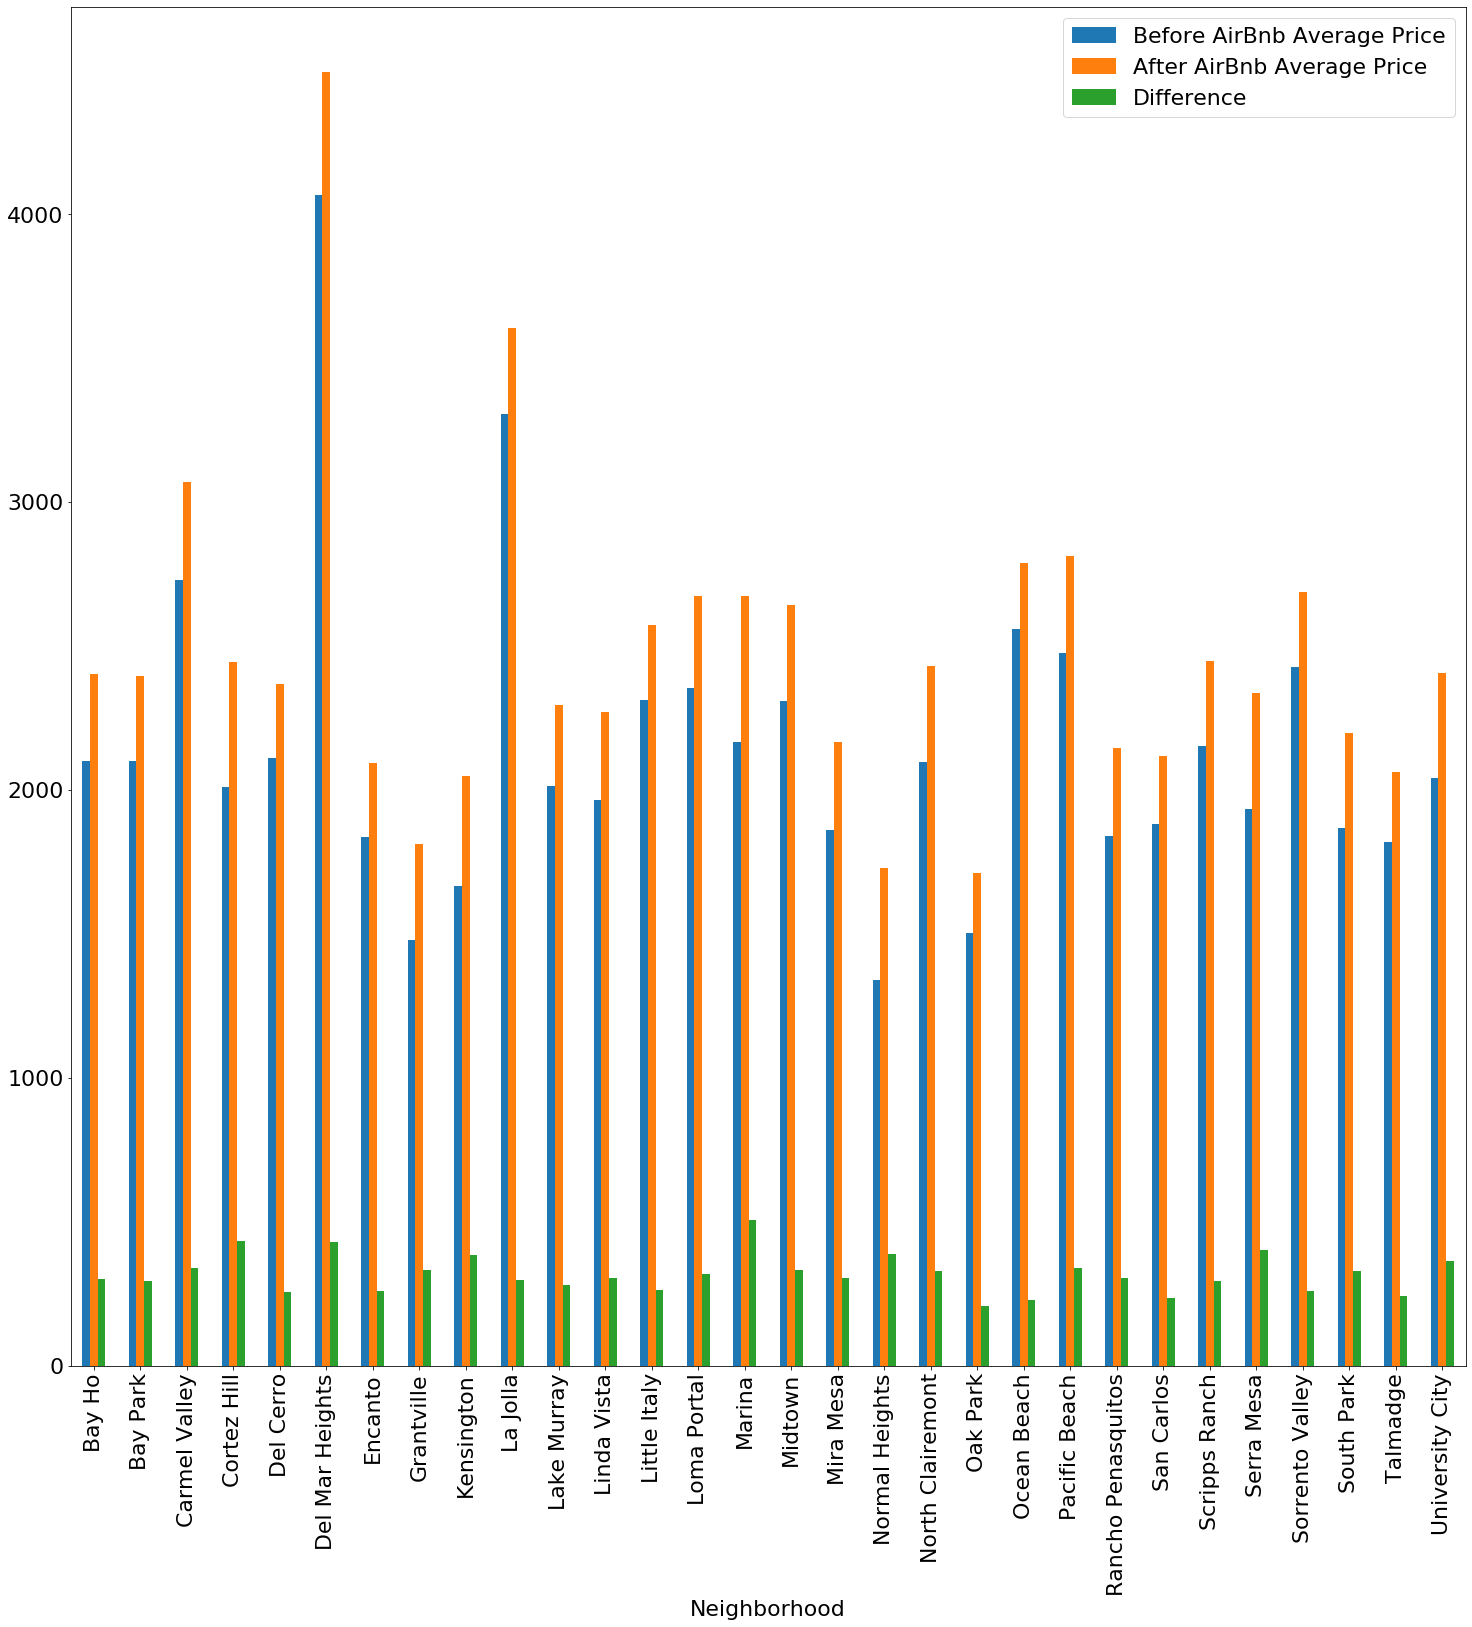

In [29]:
df_zillow_bar = df_zillow_rent.drop(df_zillow_rent.iloc[:,1:17], axis = 1)
df_zillow_bar = df_zillow_bar.rename(columns={"RegionName": "Neighborhood"})
df_zillow_bar = df_zillow_bar.set_index('Neighborhood')
plt.rcParams.update({'font.size': 22})
df_zillow_bar.plot.bar(figsize=(25,25))

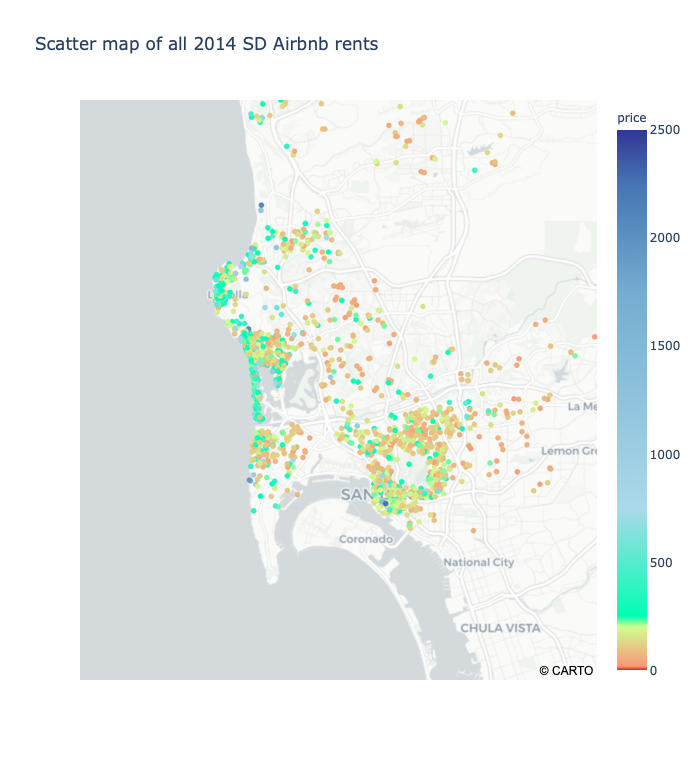

In [30]:
Image(filename='2014.png') 

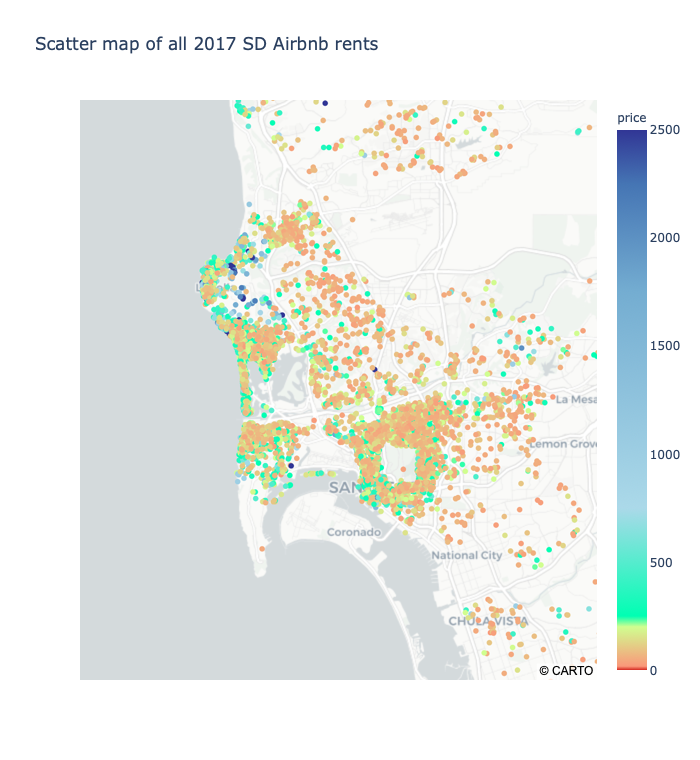

In [31]:
Image(filename='2017.png') 

# Ethics & Privacy

Both datasets are publicly available used in many Kaggle projects and cited with articles. As for public side of the data, Zillow has their datasets listed on their website under Zillow research portion which is publicly available to download. For Airbnb data scraping, Tom Slee has performed and collabrated with Inside Airbnb to tackle research topics regarding the Airbnb prices, and the data has been mentioned in multiple papers and articles which highlights the lack of privacy concern. Additionally the data we are using are anonymized and does not include sensitive information regarding the listing of rentals in both and Zillow and Airbnb. 

The dataset is raw data of prices and location of Airbnb’s in each city. We are soley looking at prices in a time frame and neighborhood locations in San Diego. Therfore, we are not using sensitive data such as personalized data that can hinder with privacy and ethics. We also will not focus our analysis on specific addresses but on surrounding locations based on the locations of an Airbnb. During our data cleaning process, we dropped columns regarding any possible scenarios when "the right to be forgotten" would take place. By dropping columns such as host id, longitude and latitude, our project would already have them removed which will not voilate anyone's privacy. Moreoever, our project focuses on objective inferences given from the rental prices in San Diego. 

One of the potential biases that can face is the distribution of rent prices according to wealthy and non-wealthy neighborhoods. Definetly neighborhoods such as Torrey Pines and Wooded Area will have higher concentraion in annual income per household compared to Oak Park and Rolando. Another bias we can attribute is the popularity by visitor levels, as touristy neighborhoods will have higher rent prices in general with higher booking rates as well. Additionally these biases can also be attributed to ethnic groups within the neighborhood as well. Our way to overcome these biases are to compare the average rent prices per neighborhood rather than summarizing all cities into one and we also avoided any potential labeling of a city that might bring up these biases as well.


# Conclusion & Discussion
Fill in your discussion information here


# Team Contributions
* John Joungseo Kim
    * fsfs
* Oscar Reyes
    * fsfs
* Hae-Chan Grace Kim
    * fsfs
* Edgar Matias
    * xcxx
* Aaron Hernandez
    * csfsf
